# Энергия ферромагнетика 2D (2023)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import typing
import time

from numba import njit, prange, objmode
from tqdm import trange

In [3]:
Lx_4_right = [ -1.99715844, -1.99396091, -1.98856632, -1.98016965, -1.96786355, -1.95064256,
 -1.9274244,  -1.89711215, -1.85871667, -1.81153907, -1.75538029, -1.69071311,
 -1.61874282, -1.54131149, -1.46065977, -1.37911648, -1.29880759, -1.22145424,
 -1.14828469, -1.0800446,  -1.01706963, -0.95938399, -0.90679838, -0.85899291,
 -0.8155803,  -0.77615005, -0.74029707, -0.70763857, -0.67782287, -0.65053286,
 -0.62548613, -0.60243323, -0.58115501, -0.56145948, -0.5431787,  -0.52616582,
 -0.5102923,  -0.49544555, -0.48152673, -0.46844889]
kT = np.arange(1, 5, 0.1)
Lxs = np.arange(2, 9, 1, dtype=np.int8)
Ly =4
J = 1

In [17]:
@njit(fastmath=True)
def my_bin(num : np.int64, N : np.int8):
    '''
    Функция по вводимому натуральному числу возвращает массив длины N (если длина получившегося представления меньше 8, то 
    массив с начала заполняется -1) его двоичного представления, вместо 0 записывается -1.
    -------
    Вводимые параметры:
        num : np.int64 - число, по которому строится массив
        N : np.int8 - длина массива
    -------
    Возвращаемое значение:
    arr (... N), состоящий из 1 и -1
    -------
    Пример:
    >>> my_bin(5, 8)
    
    array([-1, -1, -1, -1, -1,  1, -1,  1], dtype=int8)
    
    '''
    arr = np.full(N, -1, dtype=np.int8)
    pos = N - 1
    
    while num > 0:
        
        if num % 2 != 0:
            arr[pos] = 1
            
        num = num // 2
        pos -= 1
    return arr


@njit(parallel=True, fastmath=True)
def izing_single(Lx: np.int8, Ly : np.int8, kT: np.ndarray):
    '''
    Функция рассчитывает массив нормированного значения средней энергии
    согласно модели Изинга с заданными параметрами решетки молекул
    -------
    Вводимые параметры:
        Lx : np.int8 - размер решетки молекул по X
        Ly : no.int8 - размер решетки молекул по Y
        kT : np.ndarray - массив температур, умноженных на константу Больцмана
    -------
    Возвращаемое значение:
    arr (..., len(kT)) - массив нормированного значения средней энергии
    согласно модели Изинга с заданными параметрами решетки молекул Lx, Ly при температурах,
    умноженных на константу Больцмана kT
    -------
    Пример:
    >>> kT = np.arange(1, 5, 0.1)
    >>> Lx = 2
    >>> Ly =4
    
    [-1.99509475 -1.98967877 -1.9807486  -1.96731112 -1.94851447 -1.92375803
     -1.89277259 -1.85565638 -1.81286305 -1.76514734 -1.71347559 -1.65892231
     -1.60257414 -1.54544902 -1.48844227 -1.43229547 -1.37758952 -1.32475218
     -1.27407525 -1.22573616 -1.17982009 -1.1363428  -1.09526754 -1.05652099
     -1.02000565 -0.9856089  -0.95321091 -0.92268863 -0.89392041 -0.86678829
     -0.84117909 -0.81698626 -0.79410929 -0.77245481 -0.75193628 -0.73247311
     -0.71399173 -0.69642332 -0.6797055  -0.6637802 ]
    
    '''
    sys_energy = np.empty(len(kT))
    N = Lx * Ly
    
    for kt in prange(len(kT)):
        
        Es = np.zeros(2**N, dtype=np.int8)
        Zs = np.zeros(2**N, dtype=np.float32)
        
        for s in range(2**N):
            
            E, J = 0, 1
            sigmas = my_bin(s, N).reshape(Lx, Ly)
            
            for i in range(-1, Lx-1):
                for j in range(-1, Ly-1):
                    
                    E -= J * sigmas[i, j] * (sigmas[i, j + 1] + sigmas[i + 1, j])
                    
            Z = np.exp(- E / kT[kt])
            Zs[s] = Z
            Es[s] = E

        sys_energy[kt] = np.sum(Es*Zs)* (1/(Lx*Ly*np.sum(Zs)))
    return sys_energy

In [18]:
for Lx in Lxs[:-2]:
    start = time.time()
    ans = izing_single(Lx, Ly, kT)
    print(f'При Lx = {Lx} время выполнения = {time.time() - start} секунд')
    print()
    print(ans)


При Lx = 2 время выполнения = 1.437605619430542 секунд

[-1.99509475 -1.98967877 -1.9807486  -1.96731112 -1.94851447 -1.92375803
 -1.89277259 -1.85565638 -1.81286305 -1.76514734 -1.71347559 -1.65892231
 -1.60257414 -1.54544902 -1.48844227 -1.43229547 -1.37758952 -1.32475218
 -1.27407525 -1.22573616 -1.17982009 -1.1363428  -1.09526754 -1.05652099
 -1.02000565 -0.9856089  -0.95321091 -0.92268863 -0.89392041 -0.86678829
 -0.84117909 -0.81698626 -0.79410929 -0.77245481 -0.75193628 -0.73247311
 -0.71399173 -0.69642332 -0.6797055  -0.6637802 ]
При Lx = 3 время выполнения = 0.004000663757324219 секунд

[-1.99711814 -1.99383502 -1.98825042 -1.97949149 -1.96659096 -1.94853634
 -1.92432357 -1.89312299 -1.85433571 -1.80777743 -1.75375188 -1.69305723
 -1.6269559  -1.55700116 -1.48487872 -1.41223015 -1.34050946 -1.27089411
 -1.20425903 -1.14118362 -1.08199258 -1.02681014 -0.9756018  -0.92823261
 -0.88450114 -0.84416285 -0.80696192 -0.77263692 -0.74093803 -0.71162678
 -0.68448246 -0.65930224 -0.6359

In [20]:
@njit(parallel=True, fastmath=True)
def izing_Lxs(Lxs : np.ndarray, Ly : np.int8, kT : np.ndarray):
    '''
    Функция рассчитывает двумерный массив нормированного значения средней энергии
    согласно модели Изинга в зависимости от параметров решетки молекул, а также выводит время выполнения расчётов для
    каждого значения Lx.
    -------
    Вводимые параметры:
        Lx : np.ndarray - массив размеров решетки по X
        Ly : no.int8 - размер решетки молекул по Y
        kT : np.ndarray - массив температур, умноженных на константу Больцмана
    -------
    Возвращаемое значение:
    arr двумерный массив размеров (len(kT), len(Lxs)) по строкам нормированного значения средней энергии
    согласно модели Изинга с параметрами решетки молекул массива Lxs, Ly при температурах,
    умноженных на константу Больцмана kT
    -------
    Пример:
    >>> kT = np.arange(1, 5, 0.1)
    >>> Lxs = np.array([2,3])
    >>> Ly =4
    >>> izing_Lxs(Lxs, Ly, kT)
    
    При Lx = 2 время выполнения = 0.0030024051666259766 секунд
    При Lx = 3 время выполнения = 0.003002643585205078 секунд
    
    array([[-1.99509408, -1.99711701],
       [-1.98967865, -1.99383609],
       [-1.9807482 , -1.9882521 ],
       [-1.96731112, -1.97949372],
       [-1.94851495, -1.96659213],
       [-1.92375788, -1.94853226],
       [-1.89277275, -1.92432648],
       [-1.85565652, -1.89312207],
       [-1.81286317, -1.85433593],
       [-1.76514828, -1.80777844],
       [-1.71347559, -1.75375188],
       [-1.65892234, -1.69305933],
       [-1.60257414, -1.62695633],
       [-1.54544916, -1.5570009 ],
       [-1.48844218, -1.48487861],
       [-1.43229534, -1.41223056],
       [-1.37758951, -1.34050956],
       [-1.32475223, -1.27089436],
       [-1.27407505, -1.20425895],
       [-1.22573604, -1.14118328],
       [-1.17982009, -1.08199266],
       [-1.1363428 , -1.0268093 ],
       [-1.09526775, -0.9756016 ],
       [-1.05652093, -0.92823297],
       [-1.0200058 , -0.88450088],
       [-0.98560873, -0.84416301],
       [-0.95321065, -0.80696149],
       [-0.92268863, -0.77263712],
       [-0.89392041, -0.74093802],
       [-0.86678829, -0.71162685],
       [-0.84117929, -0.6844822 ],
       [-0.81698626, -0.6593021 ],
       [-0.7941092 , -0.63590254],
       [-0.77245493, -0.61411697],
       [-0.75193627, -0.59379585],
       [-0.73247317, -0.57480481],
       [-0.71399178, -0.5570236 ],
       [-0.69642346, -0.54034455],
       [-0.67970555, -0.52467128],
       [-0.66378015, -0.50991695]])
    
    '''
    J = 1
    sys_energy = np.empty((len(kT), len(Lxs)), dtype = np.float64)

    for lx in range(len(Lxs)):
        
        with objmode(start='f8'):
            start = time.time()
            
        Lx = Lx_arr[lx]
        N = Lx * Ly
        arr = np.arange(N)
        
        for kt in range(len(kT)):
            
            Es = np.zeros(2**N, dtype=np.int8)
            Zs = np.zeros(2**N, dtype=np.float32)
            
            for s in prange(2**N):
                E = 0
                sigmas = (((s >> arr) % 2) * 2 - 1).reshape(Lx, Ly)
                
                for i in range(-1, Lx-1):
                    for j in range(-1, Ly-1):
                        
                        E -= J * sigmas[i, j] * (sigmas[i + 1, j] + sigmas[i, j + 1])
                
                Z = np.exp(- E / kT[kt])
                
                Zs[s] = Z
                Es[s] = E
                
            sys_energy[kt, lx] = np.sum(Es*Zs)* (1/(N*np.sum(Zs)))
        
        with objmode():
            end = time.time()
            print(f'При Lx = {Lx} время выполнения = {end - start} секунд')

    return sys_energy

In [22]:
result = izing_Lxs(Lxs, Ly, kT)

При Lx = 2 время выполнения = 0.0030024051666259766 секунд
При Lx = 3 время выполнения = 0.003002643585205078 секунд
При Lx = 4 время выполнения = 0.020018339157104492 секунд
При Lx = 5 время выполнения = 0.4213833808898926 секунд
При Lx = 6 время выполнения = 6.002446413040161 секунд
При Lx = 7 время выполнения = 103.19200205802917 секунд
При Lx = 8 время выполнения = 1718.3091094493866 секунд


In [23]:
np.save('kt_ls_res', result)

In [38]:
result_fin = np.load('kt_ls_res.npy')

In [50]:
for i in range(7):
    print(f"Для Lx={i +2}:")
    print(result_fin[:, i])

Для Lx=2:
[-1.99509408 -1.98967865 -1.9807482  -1.96731112 -1.94851495 -1.92375788
 -1.89277275 -1.85565652 -1.81286317 -1.76514828 -1.71347559 -1.65892234
 -1.60257414 -1.54544916 -1.48844218 -1.43229534 -1.37758951 -1.32475223
 -1.27407505 -1.22573604 -1.17982009 -1.1363428  -1.09526775 -1.05652093
 -1.0200058  -0.98560873 -0.95321065 -0.92268863 -0.89392041 -0.86678829
 -0.84117929 -0.81698626 -0.7941092  -0.77245493 -0.75193627 -0.73247317
 -0.71399178 -0.69642346 -0.67970555 -0.66378015]
Для Lx=3:
[-1.99711701 -1.99383609 -1.9882521  -1.97949372 -1.96659213 -1.94853226
 -1.92432648 -1.89312207 -1.85433593 -1.80777844 -1.75375188 -1.69305933
 -1.62695633 -1.5570009  -1.48487861 -1.41223056 -1.34050956 -1.27089436
 -1.20425895 -1.14118328 -1.08199266 -1.0268093  -0.9756016  -0.92823297
 -0.88450088 -0.84416301 -0.80696149 -0.77263712 -0.74093802 -0.71162685
 -0.6844822  -0.6593021  -0.63590254 -0.61411697 -0.59379585 -0.57480481
 -0.5570236  -0.54034455 -0.52467128 -0.50991695]
Для 

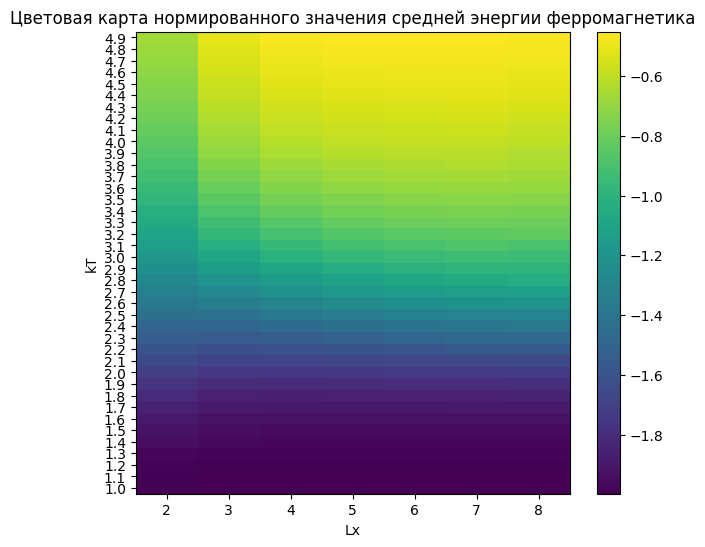

In [41]:
plt.figure(figsize=(7,6))
plt.pcolormesh(Lxs, kT, result_fin)
plt.title('Цветовая карта нормированного значения средней энергии ферромагнетика')

plt.xticks(Lxs)
plt.yticks(kT)

plt.xlabel('Lx')
plt.ylabel('kT')

plt.colorbar()

In [93]:
# a = np.arange(8)
# for i in range(100):
#     print(((i >> a) % 2))
#     print(((i >> a) % 2) * 2 -1)

[0 0 0 0 0 0 0 0]
[-1 -1 -1 -1 -1 -1 -1 -1]
[1 0 0 0 0 0 0 0]
[ 1 -1 -1 -1 -1 -1 -1 -1]
[0 1 0 0 0 0 0 0]
[-1  1 -1 -1 -1 -1 -1 -1]
[1 1 0 0 0 0 0 0]
[ 1  1 -1 -1 -1 -1 -1 -1]
[0 0 1 0 0 0 0 0]
[-1 -1  1 -1 -1 -1 -1 -1]
[1 0 1 0 0 0 0 0]
[ 1 -1  1 -1 -1 -1 -1 -1]
[0 1 1 0 0 0 0 0]
[-1  1  1 -1 -1 -1 -1 -1]
[1 1 1 0 0 0 0 0]
[ 1  1  1 -1 -1 -1 -1 -1]
[0 0 0 1 0 0 0 0]
[-1 -1 -1  1 -1 -1 -1 -1]
[1 0 0 1 0 0 0 0]
[ 1 -1 -1  1 -1 -1 -1 -1]
[0 1 0 1 0 0 0 0]
[-1  1 -1  1 -1 -1 -1 -1]
[1 1 0 1 0 0 0 0]
[ 1  1 -1  1 -1 -1 -1 -1]
[0 0 1 1 0 0 0 0]
[-1 -1  1  1 -1 -1 -1 -1]
[1 0 1 1 0 0 0 0]
[ 1 -1  1  1 -1 -1 -1 -1]
[0 1 1 1 0 0 0 0]
[-1  1  1  1 -1 -1 -1 -1]
[1 1 1 1 0 0 0 0]
[ 1  1  1  1 -1 -1 -1 -1]
[0 0 0 0 1 0 0 0]
[-1 -1 -1 -1  1 -1 -1 -1]
[1 0 0 0 1 0 0 0]
[ 1 -1 -1 -1  1 -1 -1 -1]
[0 1 0 0 1 0 0 0]
[-1  1 -1 -1  1 -1 -1 -1]
[1 1 0 0 1 0 0 0]
[ 1  1 -1 -1  1 -1 -1 -1]
[0 0 1 0 1 0 0 0]
[-1 -1  1 -1  1 -1 -1 -1]
[1 0 1 0 1 0 0 0]
[ 1 -1  1 -1  1 -1 -1 -1]
[0 1 1 0 1 0 0 0]
[-1  1  1 -1  